In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/am/Desktop/311_Service_Requests_from_2010_to_Present_min (1).csv',error_bad_lines=False , parse_dates = ['Created Date'])
df.head()

FileNotFoundError: [Errno 2] File b'/Users/am/Desktop/311_Service_Requests_from_2010_to_Present_min (1).csv' does not exist: b'/Users/am/Desktop/311_Service_Requests_from_2010_to_Present_min (1).csv'

# Identifying top complaint type

In [49]:
df_complaints = df['Complaint Type'].value_counts()


In [50]:
#Top 10 complaints

top_10_complaints = df_complaints[0:10]
print("The top 10 complaints account for " , round((sum(df_complaints[0:10])/sum(df_complaints))*100) , '% of total complaints')


The top 10 complaints account for  40 % of total complaints


Text(0.5, 1.0, 'Number of complaints per complaint type')

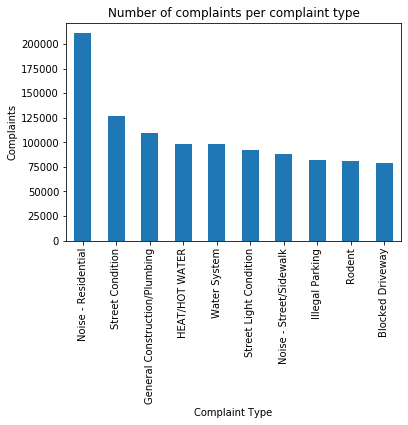

In [51]:
#Visualizing top 10 complaints 

top_10_complaints.plot(kind = 'bar')
plt.xlabel('Complaint Type')
plt.ylabel('Complaints')
plt.title('Number of complaints per complaint type')

# Identifying high complaint bouroughs , zip codes, and streets

In [52]:
x = top_10_complaints.index.to_list()
top_areas = df[df['Complaint Type'].isin (x)][['Complaint Type' , 'Borough' , 'Incident Zip' , 'Street Name']]
top_areas = top_areas.rename(columns = {'Street Name':'Address'})

Text(0.5, 1.0, 'Boroughs with highest number of complaints')

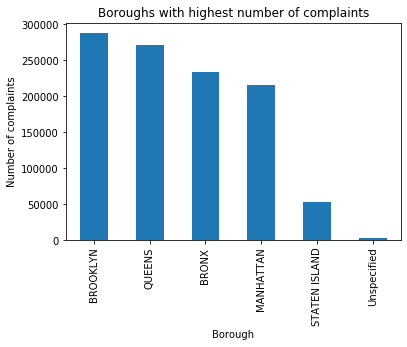

In [53]:
#Boroughs 
top_areas['Borough'].value_counts().plot(kind = 'bar')
plt.xlabel('Borough')
plt.ylabel('Number of complaints')
plt.title('Boroughs with highest number of complaints')

Text(0.5, 1.0, 'Zip Codes with highest number of complaints')

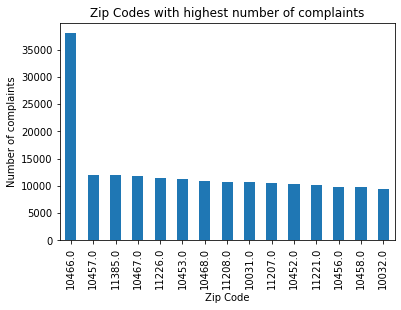

In [54]:
#Zip codes 

top_areas['Incident Zip'].value_counts()[0:15].plot(kind = 'bar')
plt.xlabel('Zip Code')
plt.ylabel('Number of complaints')
plt.title('Zip Codes with highest number of complaints')


Text(0.5, 1.0, 'Street names with highest number of complaints')

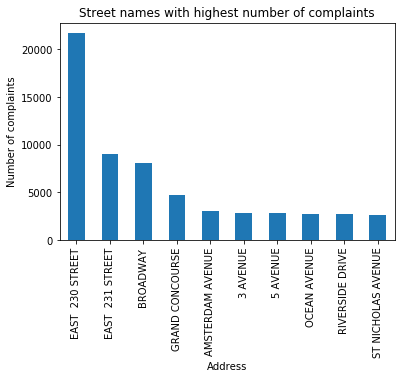

In [55]:
#Street Names

top_areas['Address'].value_counts()[0:10].plot(kind = 'bar')
plt.xlabel('Address')
plt.ylabel('Number of complaints')
plt.title('Street names with highest number of complaints')


# Relationship between housing characteristics and complaints

In [56]:
brooklyn = pd.read_csv('/Users/am/Desktop/PLUTO_for_WEB/BK_18v1.csv')
brooklyn = brooklyn[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                           'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 
                           'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
                           'YearAlter1', 'ZipCode', 'YCoord',  'XCoord']]
bronx = pd.read_csv('/Users/am/Desktop/PLUTO_for_WEB/BX_18v1.csv')
bronx = bronx[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                           'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 
                           'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
                           'YearAlter1', 'ZipCode', 'YCoord',  'XCoord']]
manhattan = pd.read_csv('/Users/am/Desktop/PLUTO_for_WEB/MN_18v1.csv')
manhattan = manhattan[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                           'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 
                           'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
                           'YearAlter1', 'ZipCode', 'YCoord',  'XCoord']]

queens = pd.read_csv('/Users/am/Desktop/PLUTO_for_WEB/QN_18v1.csv')
queens = queens[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                           'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 
                           'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
                           'YearAlter1', 'ZipCode', 'YCoord',  'XCoord']]

sisland = pd.read_csv('/Users/am/Desktop/PLUTO_for_WEB/SI_18v1.csv')
sisland = sisland[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                           'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 
                           'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
                           'YearAlter1', 'ZipCode', 'YCoord',  'XCoord']]

/Users/am/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/am/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/am/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/am/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types. Specify dtype opti

In [57]:
# Since Brooklyn has the most complaints out of all the boroughs, we will work on its respective dataframe and use only important columns
df_brooklyn = top_areas[top_areas['Borough'] == 'BROOKLYN']
df_brooklyn = df_brooklyn.rename(columns = {'Incident Address' : 'Address'})

In [58]:
#Normalize the values before proceeding to finding correlations
from sklearn import preprocessing
normalized_columns = ['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                      'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 
                      'YearAlter1']
scaler = preprocessing.MinMaxScaler().fit(brooklyn[normalized_columns])
brooklyn[normalized_columns] = scaler.transform(brooklyn[normalized_columns])



In [59]:
#Merging the 2 tables

new_df = df_brooklyn.merge(brooklyn , on = 'Address' , how = 'inner')
new_df_grouped = new_df.groupby(by = 'Complaint Type')
new_df_grouped.count()

,Borough,Incident Zip,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Blocked Driveway,257026,257026,190231,257026,257026,257026,257026,257026,257026,257026,...,257026,257026,257026,257026,257026,257026,257026,177006,113349,113349
General Construction/Plumbing,159088,113251,156892,159088,159088,159088,159088,159088,159088,159088,...,159088,159088,159088,159088,159088,159088,159088,145229,95786,95786
HEAT/HOT WATER,296176,296164,296176,296176,296176,296176,296176,296176,296176,296176,...,296176,296176,296176,296176,296176,296176,296176,272624,176235,176235
Illegal Parking,541298,541115,174932,541298,541298,541298,541298,541298,541298,541298,...,541298,541298,541298,541298,541298,541298,541298,165975,106596,106596
Noise - Residential,727741,727741,399439,727741,727741,727741,727741,727741,727741,727741,...,727741,727741,727741,727741,727741,727741,727741,371884,242258,242258
Noise - Street/Sidewalk,401042,401042,128921,401042,401042,401042,401042,401042,401042,401042,...,401042,401042,401042,401042,401042,401042,401042,123455,80605,80605
Rodent,525380,523271,228737,525380,525380,525380,525380,525380,525380,525380,...,525380,525380,525380,525380,525380,525380,525380,216092,144917,144917
Street Condition,2334332,1888969,215741,2334332,2334332,2334332,2334332,2334332,2334332,2334332,...,2334332,2334332,2334332,2334332,2334332,2334332,2334332,230956,139303,139303
Street Light Condition,2912561,2015842,31043,2912561,2912561,2912561,2912561,2912561,2912561,2912561,...,2912561,2912561,2912561,2912561,2912561,2912561,2912561,75679,34911,34911


In [60]:
#Defining a function that returns the mean of the feature inputted per complaint type

def bar_mean_plot(feature):
    new_df_grouped[feature].mean().sort_values(ascending = True).plot(kind = 'line', figsize = (10, 7))
    plt.xticks(rotation=75)
    plt.xlabel('Complaint Type')
    plt.ylabel('Mean '+ feature)

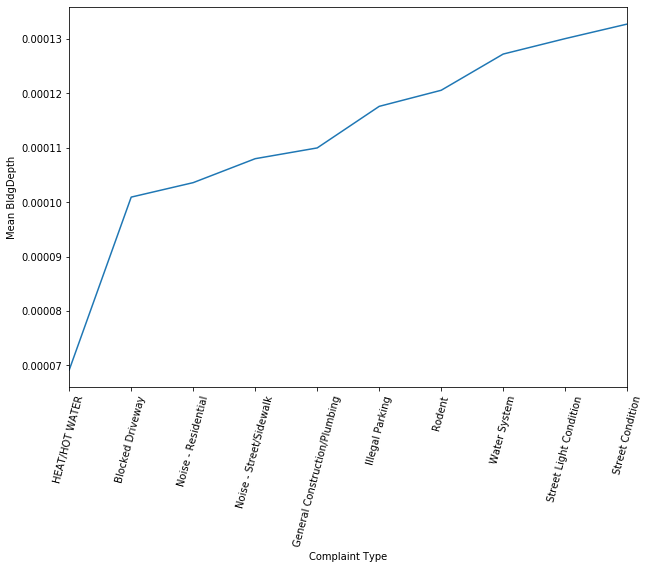

In [61]:
#Building Depth
bar_mean_plot('BldgDepth')

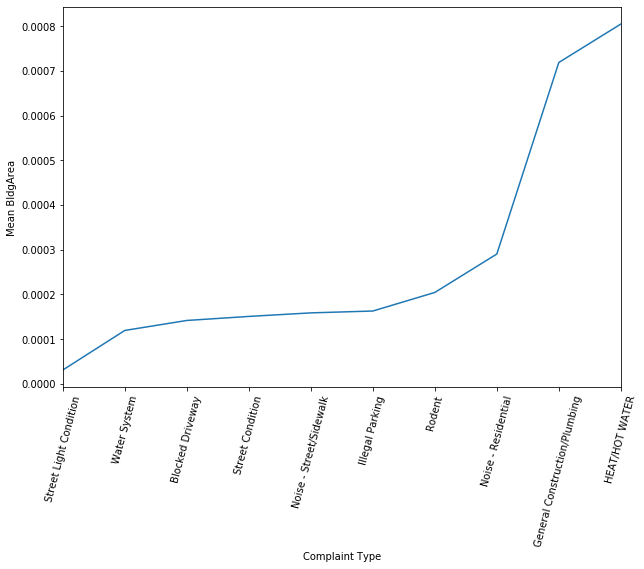

In [62]:
#Building Area
bar_mean_plot('BldgArea')

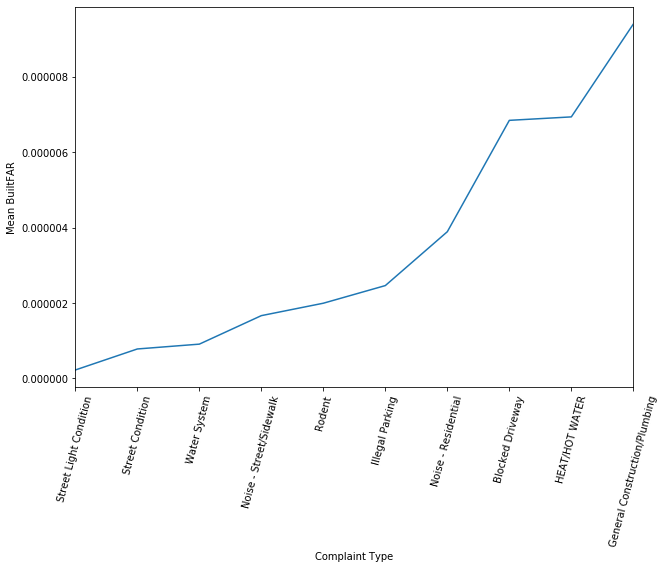

In [63]:
#BuiltFAR
bar_mean_plot('BuiltFAR')

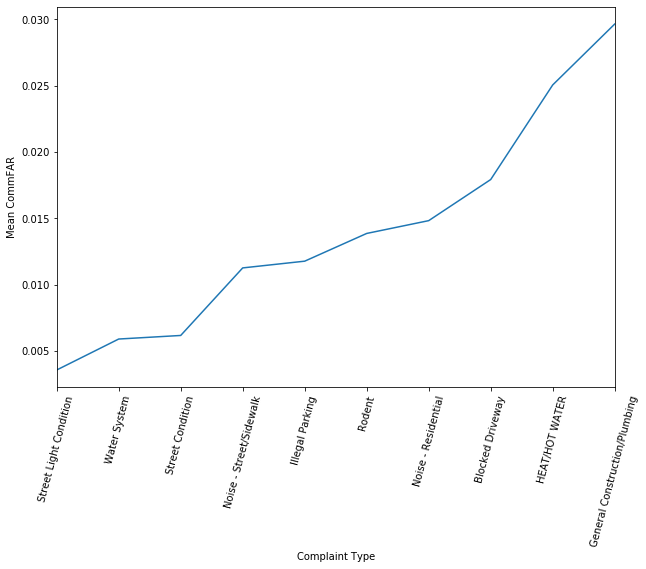

In [64]:
#CommFAR
bar_mean_plot('CommFAR')

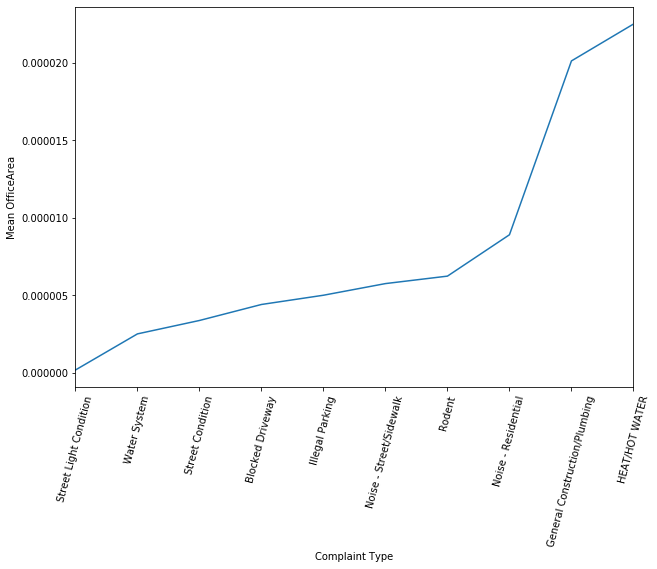

In [65]:
#CommFAR
bar_mean_plot('OfficeArea')

# Predictive Modeling 

In [69]:
df_modeling = df[df['Complaint Type'].isin (x)][['Created Date' , 'Complaint Type' ]]
df_modeling['Created Date'] = pd.to_datetime(df_modeling['Created Date']).dt.date

In [70]:
#We will narrow down our model to the top complaint type, non-residential 

df_modeling_heat = df_modeling[df_modeling['Complaint Type'] == 'HEAT/HOT WATER']

In [71]:
#Creating a time series

time_series_HH = pd.Series(1 , index = df_modeling_heat['Created Date'])
time_series_HH = time_series_HH.resample('M').sum()
 

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'